### The manufacturing dataset consists of the following columns:

**Temperature (°C):** This column represents the temperature during the manufacturing process, measured in degrees Celsius. Temperature plays a critical role in many manufacturing processes, influencing material properties and product quality.

**Pressure (kPa):** The pressure applied during the manufacturing process, measured in kilopascals (kPa). Pressure can affect the material transformation and the overall outcome of the manufacturing process.

**Temperature x Pressure:** This feature is an interaction term between temperature and pressure, which captures the combined effect of these two process parameters.

**Material Fusion Metric:** A derived metric calculated as the sum of the square of temperature and the cube of pressure. It represents a material fusion-related measurement during the manufacturing process.

**Material Transformation Metric:** Another derived metric calculated as the cube of temperature minus the square of pressure. It provides insight into material transformation dynamics.

**Quality Rating:** The target variable, 'Quality Rating,' represents the overall quality rating of the produced items. Quality is a crucial aspect of manufacturing, and this rating serves as a measure of the final product's quality.

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [41]:
df = pd.read_csv('Downloads/manufacturing.csv')
display(df.head())

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


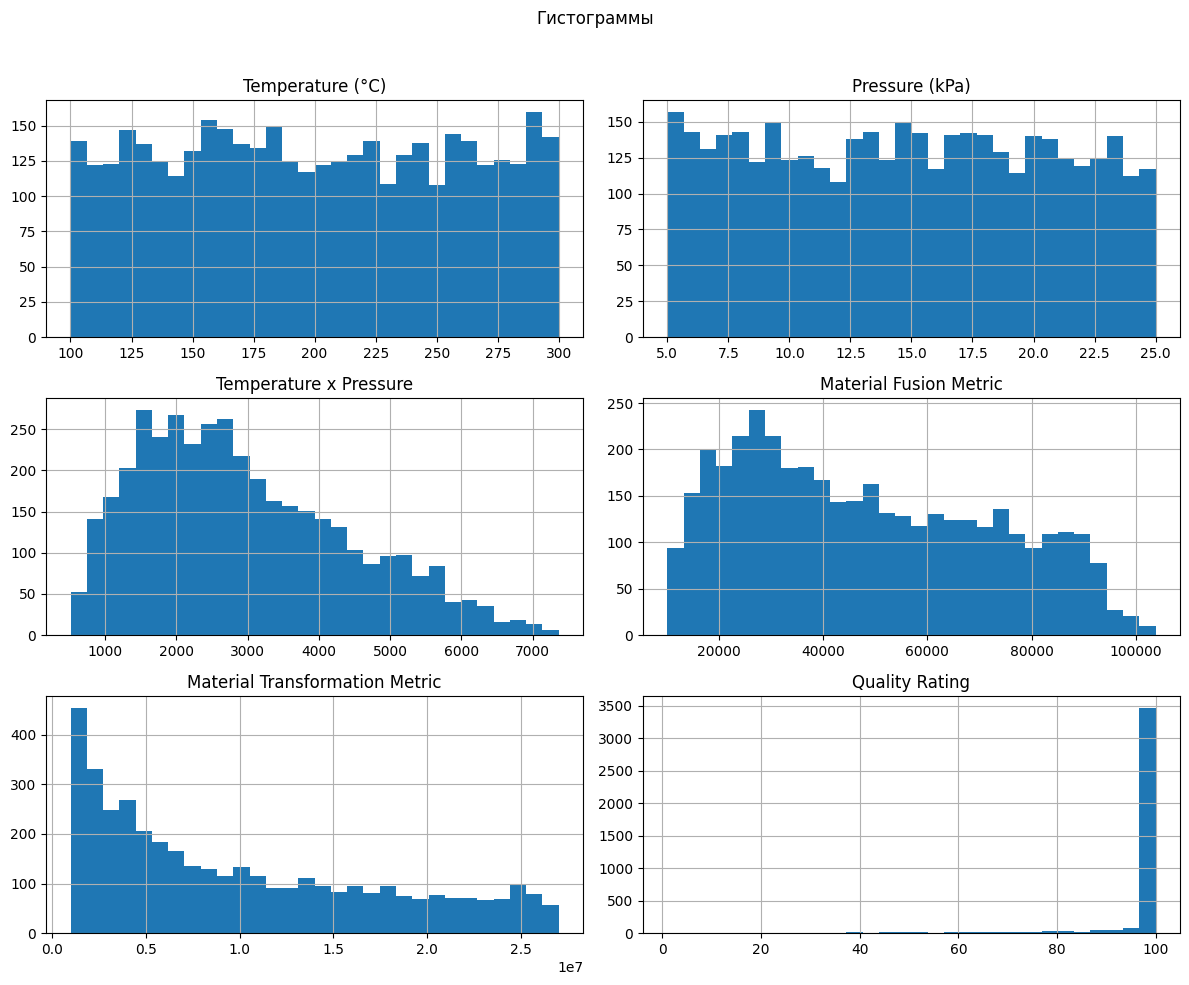

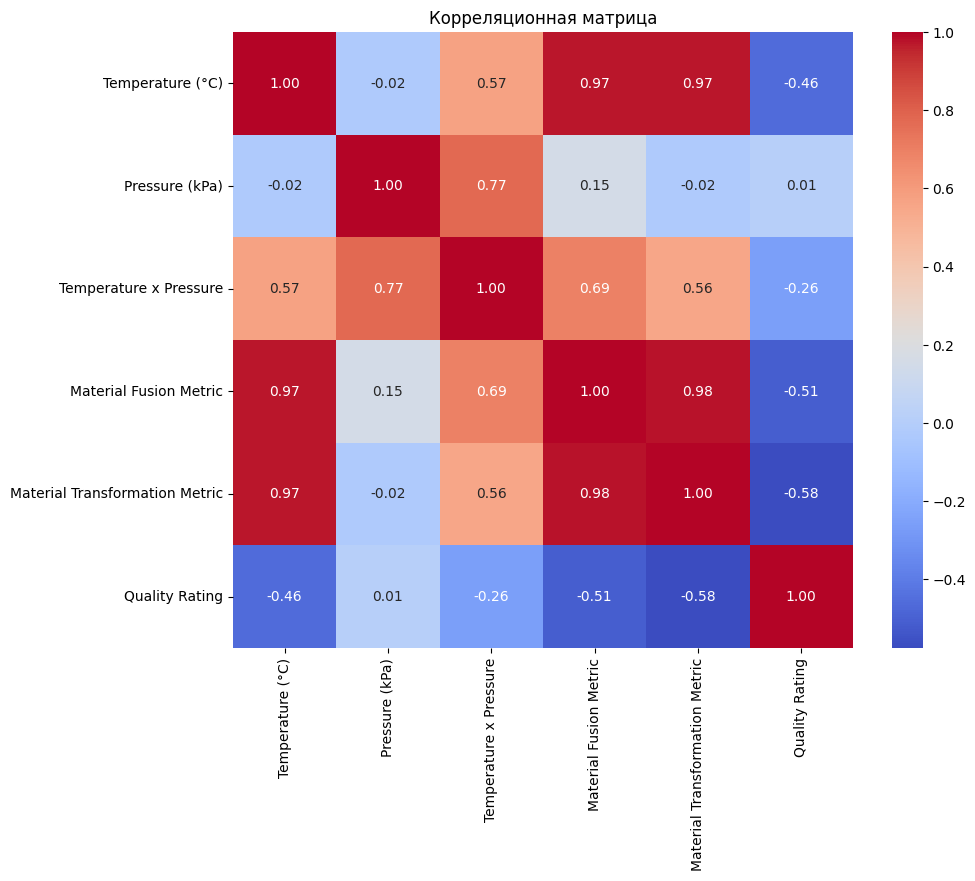

In [42]:
# Распределение фич и таргета
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Гистограммы")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Корреляционная матрица
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [69]:
X = df.drop('Quality Rating', axis=1)
y = df['Quality Rating']

# Разделяем на тренировочный и тестовый датасет
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [70]:
# Создаем полиномиальную регрессию
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [71]:
# Метрики
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MedAE: {medae}")
print(f"MSLE: {msle}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 2.9521328503469992
MAPE: 0.10224747735666743
MedAE: 2.2405504754856054
MSLE: 0.029815525663121824
MSE: 22.02382682213637
RMSE: 4.692955020254975
R-squared: 0.8776585855369601


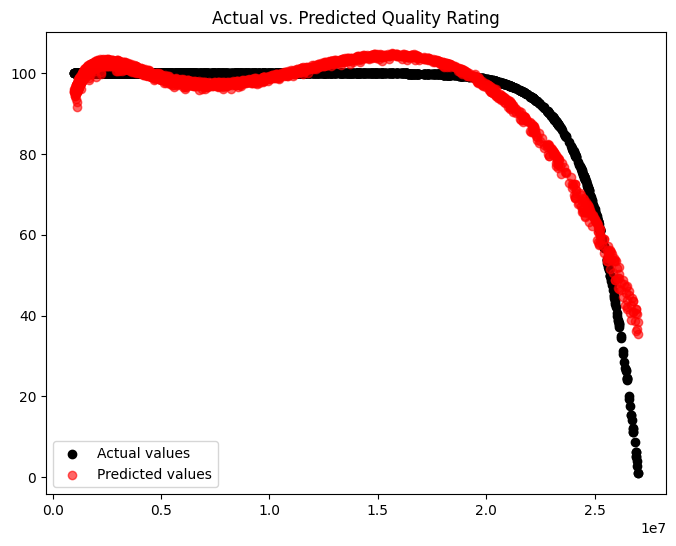

In [72]:
# Создаем скаттер-плот
plt.figure(figsize=(8, 6))
plt.scatter(X_test_poly[:, 4], y_test, color='black', label='Actual values')
plt.scatter(X_test_poly[:, 4], y_pred, color='red', label='Predicted values', alpha=0.6)
plt.title("Actual vs. Predicted Quality Rating")
plt.legend()
plt.show()

In [73]:
# Полиномиальная регрессия c Ridge регуляризацией
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge_model = Ridge(alpha=11)
ridge_model.fit(X_train_poly, y_train)
y_pred = ridge_model.predict(X_test_poly)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.28816e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


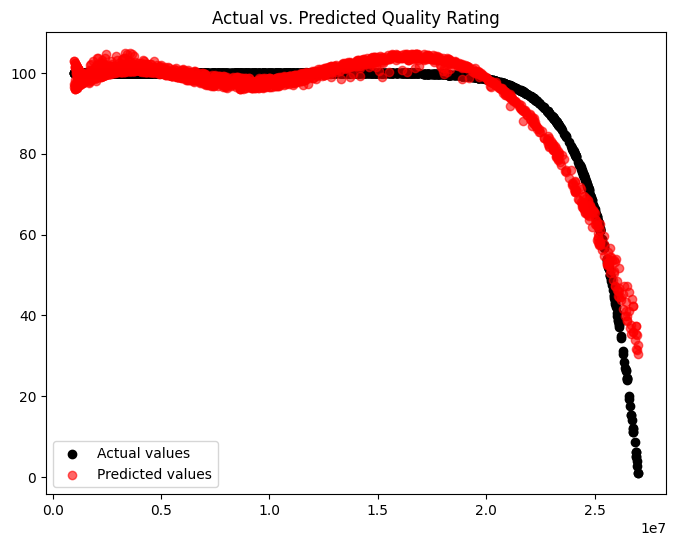

In [74]:
# Создаем скаттер-плот
plt.figure(figsize=(8, 6))
plt.scatter(X_test_poly[:, 4], y_test, color='black', label='Actual values')
plt.scatter(X_test_poly[:, 4], y_pred, color='red', label='Predicted values', alpha=0.6)
plt.title("Actual vs. Predicted Quality Rating")
plt.legend()
plt.show()